<a href="https://colab.research.google.com/github/mohitsaini65/Cotton-Plant-Disease-Prediction/blob/main/Cotton_Disease_Prediction_ResNet152V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/train"
test_path  = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/test"


In [ ]:
resnet152V2 = ResNet152V2(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False
)

for layer in resnet152V2.layers:
    layer.trainable = False

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
folders = glob(train_path + '/*')

In [ ]:
x = Flatten()(resnet152V2.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(
    inputs=resnet152V2.input,
    outputs=prediction
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 58,733,060 (224.05 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 58,331,648 (222.52 MB)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 627s 10s/step - accuracy: 0.7416 - loss: 1.3638 - val_accuracy: 0.8889 - val_loss: 0.3203
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 35s 568ms/step - accuracy: 0.9372 - loss: 0.4445 - val_accuracy: 0.9444 - val_loss: 0.1393
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 585ms/step - accuracy: 0.9476 - loss: 0.3591 - val_accuracy: 0.9444 - val_loss: 0.1359
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 588ms/step - accuracy: 0.9428 - loss: 0.4450 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 591ms/step - accuracy: 0.9448 - loss: 0.5761 - val_accuracy: 1.0000 - val_loss: 0.0190
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 582ms/step - accuracy: 0.9603 - loss: 0.3279 - val_accuracy: 0.9444 - val_loss: 0.9566
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 577ms/step - accuracy: 0.9671 - loss: 0.2112 - val_accuracy: 0.8889 - val_loss: 0.4634
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 35s 570ms/step - accuracy: 0.9620 - loss: 0.3502 - val_accur

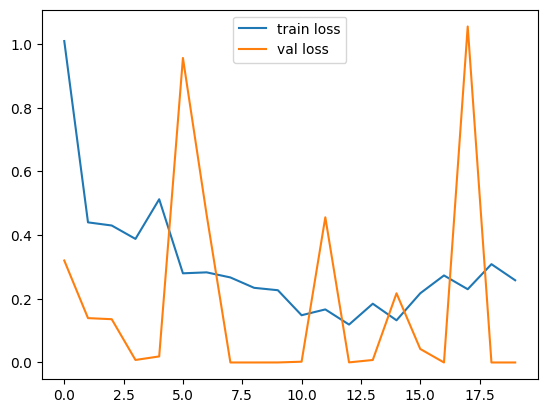

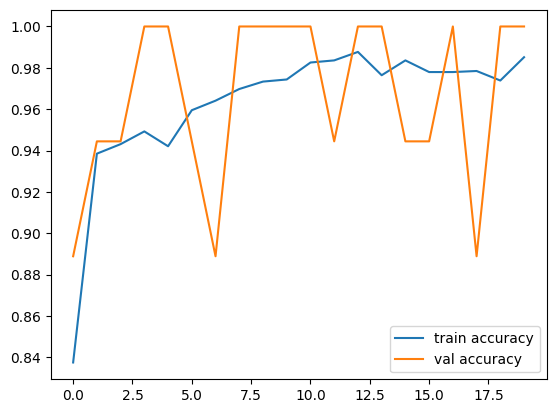

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [ ]:
model.save("/content/model_resnet152v2_cotton.keras")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/model_resnet152v2_cotton.keras")

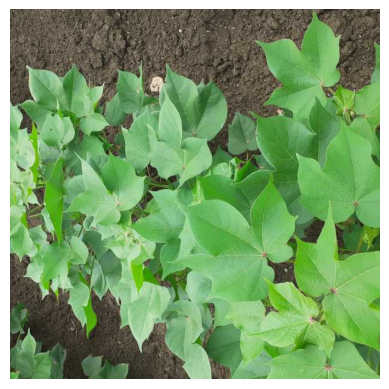

In [ ]:
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/val/fresh cotton plant/dsd (160)_iaip.jpg"

img = plt.imread(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import numpy as np

img_path = "/content/drive/MyDrive/Colab Notebooks/Cotton-Plant-Disease-Dataset/data/val/fresh cotton plant/dsd (160)_iaip.jpg"

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = model.predict(x)
pred_class = np.argmax(pred, axis=1)

print("Predicted class index:", pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Predicted class index: [3]


In [ ]:
print(training_set.class_indices)

{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}


In [ ]:
class_names = list(training_set.class_indices.keys())
print("Predicted class:", class_names[pred_class[0]])

Predicted class: fresh cotton plant
